# Линейная регрессия

Данные содержатся в файле `data/lin_reg.txt`. Прочитать их можно следующим так:

In [80]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'
D = np.loadtxt('../data/lin_reg.txt', delimiter=',')
X = D[:, :-1]
Y = D[:, -1]


При выполнении заданий **нельзя** пользоваться `scikit-learn` и т.п., только `NumPy`/`JAX`/`TF`/`PyTorch` и `matplotlib`/`seaborn`/`plotly`/etc.

1. Нарисуйте график среднеквадратичной ошибки в зависимости от параметра регуляризации $\alpha$, используя полные данные для обучения и для тестирования. 
2. Подготовьте исходные данные для 5 fold CV.
3. С помощью CV найдите оптимальное значение $\alpha$ на какой-нибудь сетке значений.
4. Постройте валидационную кривую. 
5. Постройте кривую обучения.

In [81]:
X = np.c_[ np.ones(X.shape[0]), X ]

In [82]:
class LinReg:
    def __init__(self, alpha, size, lr=0.001):
        self.theta = tf.Variable(tf.random.uniform([size], 0, 1, tf.double))
        self.alpha = alpha
        self.lr = lr
        self.optimizer = tf.optimizers.SGD(self.lr)
        
    def mse(self, Y_real, Y_pred, alpha):
        return tf.reduce_mean(tf.square(Y_real - Y_pred)) + alpha * tf.norm(self.theta)**2
    
    def predict(self, X):
        return tf.linalg.matvec(X, self.theta)
    
    def run_optimization(self):
        with tf.GradientTape() as g:
            pred = self.predict(X)
            loss = self.mse(Y,pred,self.alpha)

            gradients = g.gradient(loss, [self.theta])
        
        # Update W and b following gradients.
        self.optimizer.apply_gradients(zip(gradients, [self.theta]))

    def train(self, X, Y, epochs=15):
        for step in range(1, epochs + 1):
    # Run the optimization to update W and b values.
            self.run_optimization()
            pred = self.predict(X)
            loss = self.mse(Y, pred, self.alpha)
        return loss 

In [83]:
alphas = np.linspace(0, 2, 20)
losses = []
for alpha in alphas: 
    LR = LinReg(alpha, X.shape[1])
    loss = LR.train(X,Y)
    losses.append(loss.numpy())
    print("alpha: %f, loss: %f" % (alpha, loss))

alpha: 0.000000, loss: 98.668021
alpha: 0.105263, loss: 104.834863
alpha: 0.210526, loss: 109.584507
alpha: 0.315789, loss: 115.279801
alpha: 0.421053, loss: 121.238639
alpha: 0.526316, loss: 127.037941
alpha: 0.631579, loss: 133.170210
alpha: 0.736842, loss: 139.089869
alpha: 0.842105, loss: 145.549890
alpha: 0.947368, loss: 150.722231
alpha: 1.052632, loss: 156.752879
alpha: 1.157895, loss: 162.472183
alpha: 1.263158, loss: 168.724020
alpha: 1.368421, loss: 174.361184
alpha: 1.473684, loss: 180.846101
alpha: 1.578947, loss: 186.274429
alpha: 1.684211, loss: 191.438943
alpha: 1.789474, loss: 197.331545
alpha: 1.894737, loss: 202.945711
alpha: 2.000000, loss: 209.225586


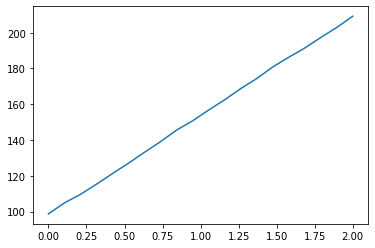

In [84]:
plt.plot(alphas, losses)

In [89]:
def CV(folds=5):
    alphas = np.linspace(0, 4, 20)
    samples_in_fold = X.shape[0] // folds
    train_losses = []
    validation_losses = []
    for alpha in alphas:
        alpha_valid_losses = []
        alpha_train_losees = []
        for i in range(folds):
            X_split = np.split(X,[2 * samples_in_fold, (2+1) * samples_in_fold])
            Y_split = np.split(Y,[2 * samples_in_fold, (2+1) * samples_in_fold])
            X_train = np.concatenate((X_split[0], X_split[2]))
            Y_train = np.concatenate((Y_split[0], Y_split[2]))
            X_test = X_split[1]
            Y_test = Y_split[1]
            LR = LinReg(alpha, X_train.shape[1])
            train_loss = LR.train(X_train, Y_train)
            validation_loss = LR.mse(LR.predict(X_test),Y_test,alpha)
            print("alpha: %f, train_loss: %f, validation_loss: %f" % (alpha, train_loss, validation_loss))
            alpha_train_losees.append(train_loss)
            alpha_valid_losses.append(validation_loss)
        train_losses.append(np.mean(alpha_train_losees))
        validation_losses.append(np.mean(alpha_valid_losses))
    return (alphas, train_losses, validation_losses)

In [90]:
CV_loss = CV(5)

alpha: 0.000000, train_loss: 97.049233, validation_loss: 102.363728
alpha: 0.000000, train_loss: 98.196545, validation_loss: 102.529561
alpha: 0.000000, train_loss: 96.669696, validation_loss: 101.657731
alpha: 0.000000, train_loss: 97.336386, validation_loss: 102.694205
alpha: 0.000000, train_loss: 97.411968, validation_loss: 102.495001
alpha: 0.210526, train_loss: 109.670638, validation_loss: 114.702867
alpha: 0.210526, train_loss: 108.801219, validation_loss: 114.373271
alpha: 0.210526, train_loss: 109.671847, validation_loss: 114.635527
alpha: 0.210526, train_loss: 108.871848, validation_loss: 114.755562
alpha: 0.210526, train_loss: 108.528042, validation_loss: 114.104031
alpha: 0.421053, train_loss: 120.694708, validation_loss: 126.939138
alpha: 0.421053, train_loss: 121.002329, validation_loss: 126.714257
alpha: 0.421053, train_loss: 120.534574, validation_loss: 127.021263
alpha: 0.421053, train_loss: 120.519743, validation_loss: 125.674336
alpha: 0.421053, train_loss: 120.130804

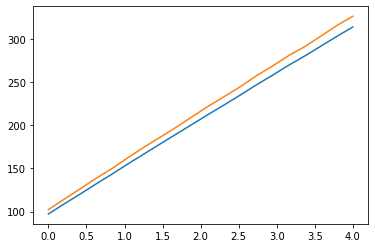

In [94]:
plt.plot(CV_loss[0],CV_loss[1])
plt.plot(CV_loss[0],CV_loss[2])
plt.show()

In [97]:
min_valid_loss_ind = np.argmin(CV_loss[2])
print ('Optimal alpha:',CV_loss[0][min_valid_loss_ind], 'loss:', CV_loss[2][min_valid_loss_ind])

Optimal alpha: 0.0 loss: 102.3480448552462
